In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [21]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv("events.csv", dtype=types, low_memory=False)



In [22]:
models = df_events[["person","model","storage","event","color","condition"]]
models = models.loc[models["event"] == "conversion" ,:]
#models

colores = {"Preto" : "Negro", "Dourado" : "Dorado", "Branco" : "Blanco", "Cinza espacial" : "Negro", "Prateado" : "Plata", "Ouro Rosa" : "Rosa",
"Rosa": "Rosa", "Cinza" : "Plata", "Azul" : "Azul", "Preto Vermelho" : "Negro", "Prata" : "Plata", "Platinum" : "Plata", "Preto Matte" : "Negro",
"Branco Vermelho" : "Blanco", "Ouro" : "Dorado", "Titânio" : "Plata", "Ametista" : "Otros", "Preto Brillhante" : "Negro", "Indigo" : "Otros",
"Amarelo" : "Otros", "Vermelho" : "Otros", "Bambu" : "Otros", "Cabernet" : "Otros", "Preto Azul" : "Negro", "Couro Vintage" : "Otros", "Azul Topázio" : "Azul"}

models["in_color"] = models['color'].apply(lambda x: colores.get(x, 'Basura'))

#models = models.loc[models['in_color'] != 'Basura']
#colores = models['in_color'].value_counts()
#colores
models.count()

In [23]:

df = df_events.loc[(df_events["country"].isnull() == False) & (df_events["country"] != "Unknown"),:]
df = df[['person','country','region']]

df = df.drop_duplicates(subset='person')


#df2 = df[["person","region","country"]]
models = models.merge(df, on='person')
#coalese o fillna
#models

In [24]:
#s16_GB = models.loc[models["storage"] == "16GB"]
s16_GB = models["country"].value_counts()
s16_GB

Brazil            1058
United Kingdom       2
United States        1
Name: country, dtype: int64

In [29]:
brazil = models.loc[models["country"] == "Brazil"]
sbrazil = brazil["storage"].value_counts()
sbrazil.index = [16,32,8,64,128,4,0.512,256]
sbrazil = sbrazil.sort_index()
sbrazil

0.512        3
4.000       14
8.000      179
16.000     503
32.000     242
64.000      93
128.000     23
256.000      1
Name: storage, dtype: int64

In [7]:
uk = models.loc[models["country"] == "United Kingdom"]
uk = uk["storage"].value_counts()
uk.index = [16,8,64,0.512,4,32,256,128]
uk = uk.sort_index()
uk


0.512      0
4.000      0
8.000      0
16.000     2
32.000     0
64.000     0
128.000    0
256.000    0
Name: storage, dtype: int64

In [8]:
eeuu = models.loc[models["country"] == "United States"]
eeuu = eeuu["storage"].value_counts()
eeuu.index = [16,8,64,0.512,4,32,256,128]
eeuu = eeuu.sort_index()
eeuu

0.512      0
4.000      0
8.000      0
16.000     1
32.000     0
64.000     0
128.000    0
256.000    0
Name: storage, dtype: int64

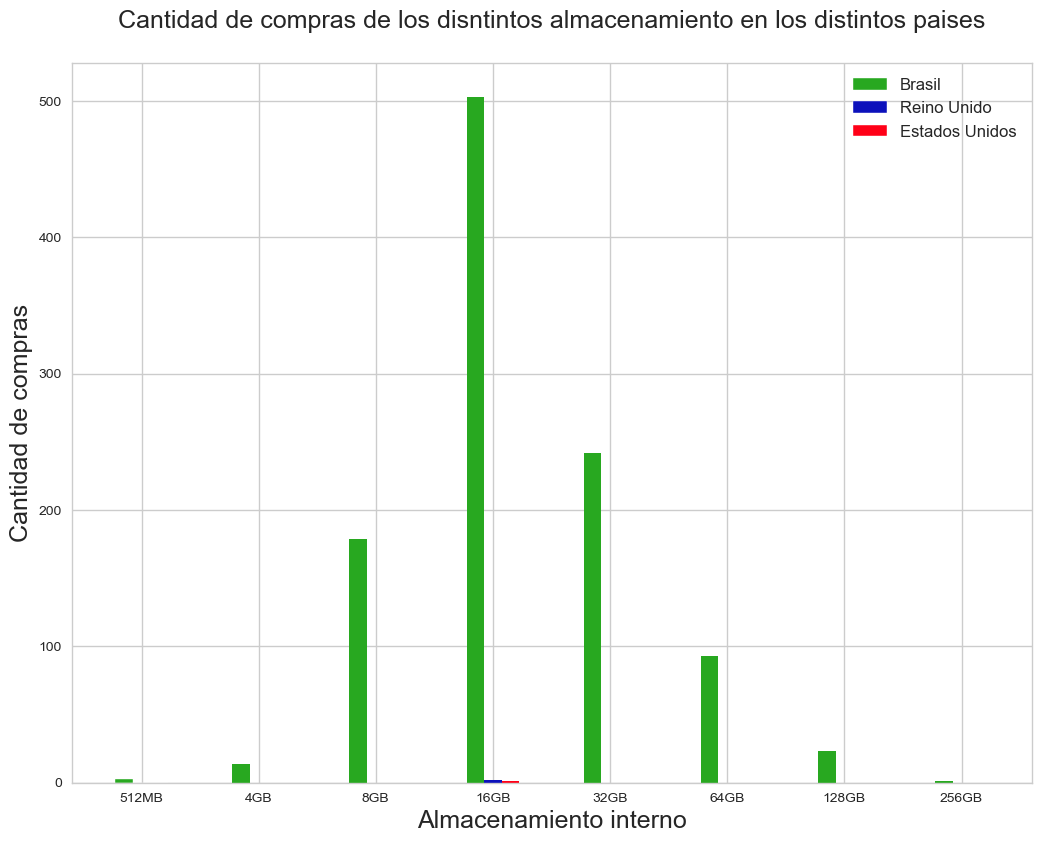

In [30]:
nombres = ["512MB","4GB","8GB","16GB","32GB","64GB","128GB","256GB"]

X = np.arange (len(nombres))
Y1 = sbrazil.values
Y2 = uk.values
Y3 = eeuu.values

plt.axes([0.025,0.025,1.5,1.5])
plt.bar(X-0.15 ,Y1,facecolor = "#28A820",label = "Brasil", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X,Y2,facecolor = "#0C11BB",label = "Reino Unido", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.15 ,Y3,facecolor = "#FF0017",label = "Estados Unidos", width = 0.15, align = "center",edgecolor = "white")



plt.xticks(X,nombres,fontsize = 10)
plt.xlabel("Almacenamiento interno",fontsize = 18)
plt.ylabel('Cantidad de compras', fontsize = 18)

plt.title('Cantidad de compras de los disntintos almacenamiento en los distintos paises\n', fontsize = 18)

plt.legend(loc="upper right", fontsize = 12)
plt.show()

In [31]:
#brazil = models.loc[(models["country"] == "Brazil")&(models["region"] != "Unknown")&(models["event"] == "conversion" )]
#sao_pablo = brazil.loc[brazil["region"] == "Sao Paulo"]
brazil = brazil.loc[brazil["region"] != "Unknown"]
top_5_regiones = brazil["region"].value_counts().head()
top_5_regiones

Sao Paulo         288
Minas Gerais      104
Rio de Janeiro     93
Bahia              79
Maranhao           43
Name: region, dtype: int64

In [32]:
sao_pablo = brazil.loc[(brazil["region"] == "Sao Paulo")]
sao_pablo = sao_pablo["storage"].value_counts()
sao_pablo.index = [16,32,8,64,128,0.512,4,256]
sao_pablo = sao_pablo.sort_index()
sao_pablo

0.512        2
4.000        2
8.000       36
16.000     146
32.000      67
64.000      27
128.000      8
256.000      0
Name: storage, dtype: int64

In [33]:
minas_gerais  = brazil.loc[brazil["region"] == "Minas Gerais"]
minas_gerais = minas_gerais["storage"].value_counts()
minas_gerais.index = [16,32,8,64,128,0.512,4,256]
minas_gerais = minas_gerais.sort_index()
minas_gerais

0.512       0
4.000       0
8.000      17
16.000     50
32.000     23
64.000     12
128.000     2
256.000     0
Name: storage, dtype: int64

In [34]:
rio  = brazil.loc[brazil["region"] == "Rio de Janeiro"]
rio = rio["storage"].value_counts()

rio.index = [16,32,8,64,4,0.512,256,128]
rio = rio.sort_index()
rio

0.512       0
4.000       4
8.000      13
16.000     36
32.000     28
64.000     12
128.000     0
256.000     0
Name: storage, dtype: int64

In [35]:
bahia  = brazil.loc[brazil["region"] == "Bahia"]
bahia = bahia["storage"].value_counts()
bahia.index = [16,8,32,64,0.512,4,128,256]
bahia  = bahia.sort_index()
bahia 

0.512       1
4.000       1
8.000      15
16.000     46
32.000     14
64.000      1
128.000     1
256.000     0
Name: storage, dtype: int64

In [36]:
maranhao  = brazil.loc[brazil["region"] == "Maranhao"]
maranhao = maranhao["storage"].value_counts()
maranhao.index = [16,32,4,8,64,0.512,256,128]
maranhao  = maranhao.sort_index()
maranhao 

0.512       0
4.000       3
8.000       2
16.000     21
32.000     15
64.000      2
128.000     0
256.000     0
Name: storage, dtype: int64

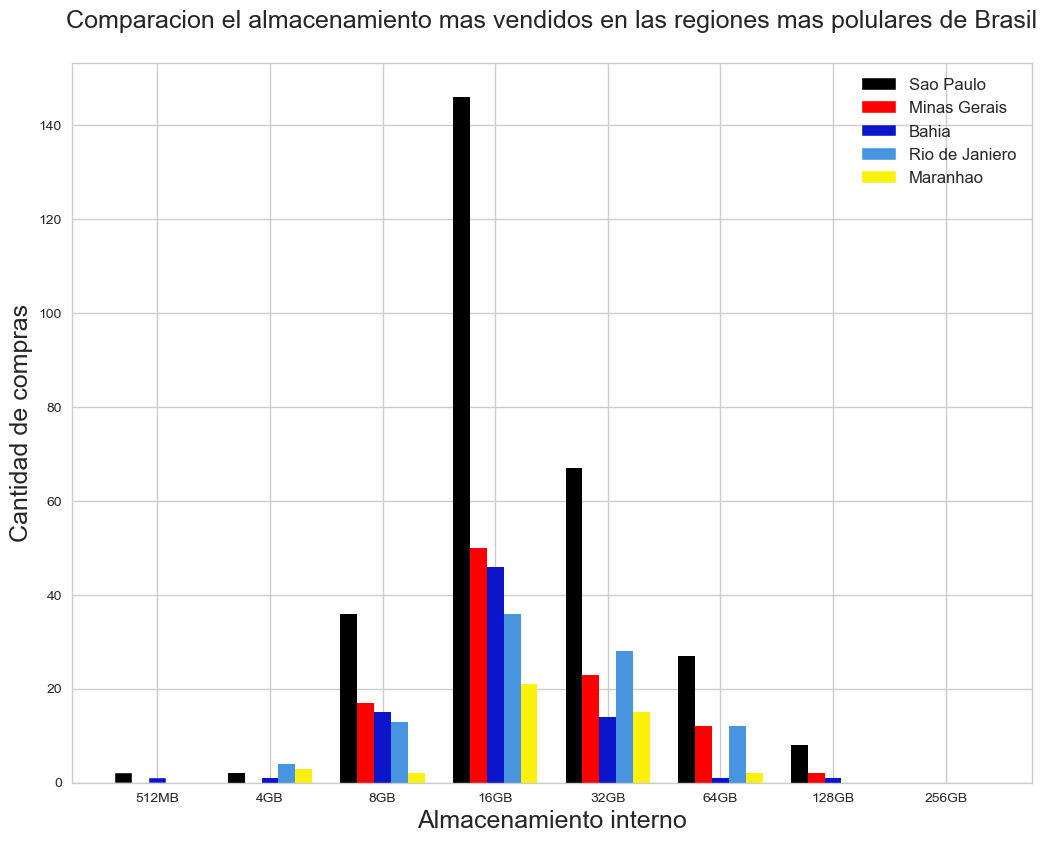

In [37]:
nombres = ["512MB","4GB","8GB","16GB","32GB","64GB","128GB","256GB"]

X = np.arange (len(nombres))
Y1 = sao_pablo.values
Y2 = minas_gerais.values
Y3 = bahia.values
Y4 = rio.values
Y5 = maranhao.values



plt.axes([0.025,0.025,1.5,1.5])
plt.bar(X-0.3 ,Y1,facecolor = "#000000",label = "Sao Paulo", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X-0.15,Y2,facecolor = "#ff0000",label = "Minas Gerais", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X ,Y3,facecolor = "#0a14c8",label = "Bahia", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.15,Y4,facecolor = "#4795e0",label = "Rio de Janiero", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.3 ,Y5,facecolor = "#fcf10c",label = "Maranhao", width = 0.15, align = "center",edgecolor = "white")


plt.xticks(X,nombres,fontsize = 10)
plt.xlabel("Almacenamiento interno",fontsize = 18)
plt.ylabel('Cantidad de compras', fontsize = 18)

plt.title('Comparacion el almacenamiento mas vendidos en las regiones mas polulares de Brasil\n', fontsize = 18)

plt.legend(loc="upper right",fontsize = 12)
plt.show()